# Part1 - Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
dataset = pd.read_excel('RP_change_all.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1748 non-null   float64
 1   Standoff distance  1748 non-null   float64
 2   Angle              1748 non-null   int64  
 3   Change time        1748 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 54.8 KB


In [3]:
y = dataset['Change time']
X = dataset.drop(['Change time'], axis=1)
print(X.shape, y.shape)

(1748, 3) (1748,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [7]:
ann = tf.keras.models.Sequential()

In [8]:
ann.add(tf.keras.layers.Dense(units=20,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=15,
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=10,
                              activation='leaky_relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 566
Trainable params: 566
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [12]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [13]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
41/41 [==============================] - 2s 23ms/step - loss: 526.5142 - mae: 15.1881 - val_loss: 35.1750 - val_mae: 4.6706
Epoch 2/500
41/41 [==============================] - 0s 4ms/step - loss: 26.6016 - mae: 3.7945 - val_loss: 20.1393 - val_mae: 3.2336
Epoch 3/500
41/41 [==============================] - 0s 4ms/step - loss: 19.2465 - mae: 3.1193 - val_loss: 22.0468 - val_mae: 3.5377
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 17.4421 - mae: 2.8918 - val_loss: 29.6634 - val_mae: 4.3252
Epoch 5/500
41/41 [==============================] - 0s 4ms/step - loss: 17.0195 - mae: 2.9310 - val_loss: 15.6987 - val_mae: 2.7831
Epoch 6/500
41/41 [==============================] - 0s 4ms/step - loss: 14.7478 - mae: 2.6419 - val_loss: 14.3294 - val_mae: 2.6864
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 14.3961 - mae: 2.6656 - val_loss: 14.1279 - val_mae: 2.6544
Epoch 8/500
41/41 [==============================] - 0s 4ms/step -

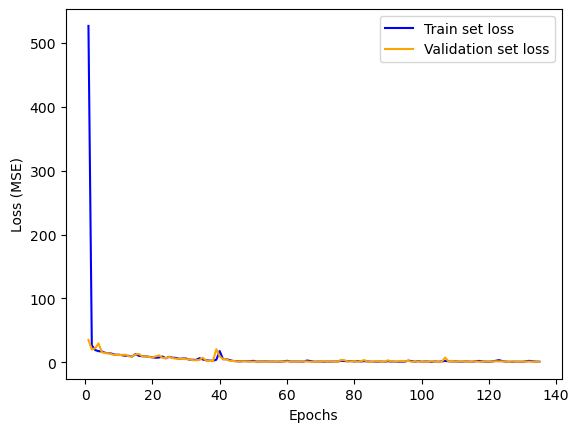

In [14]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Change_ANN1_2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

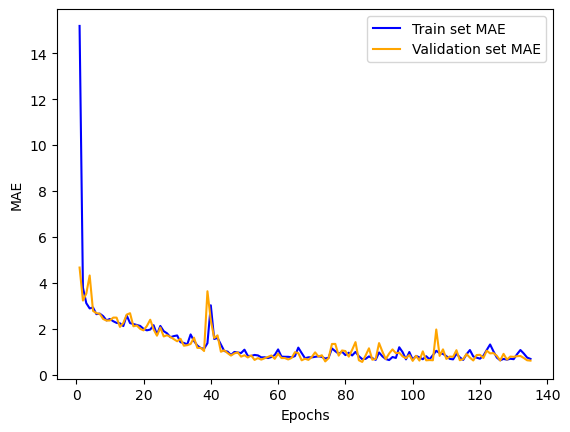

In [15]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Change_ANN1_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
print (epochs)

In [27]:
ann.save('Change_ANN1')

INFO:tensorflow:Assets written to: Change_ANN1\assets


# Part 4 - Make predictions

In [ ]:
ann = load_model('Change_ANN_model_3.h5')

9/9 [==============================] - 0s 2ms/step


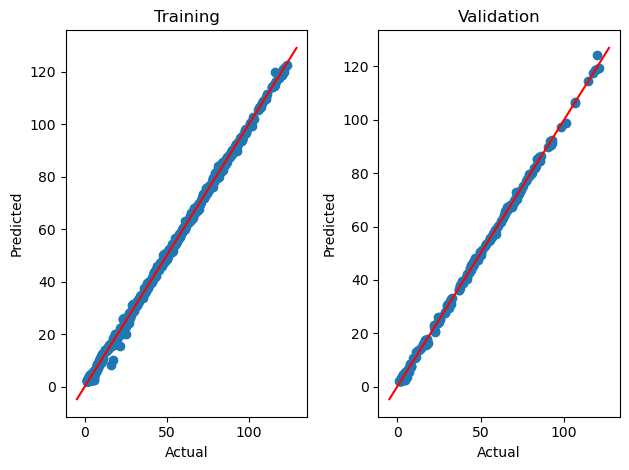

In [16]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Change_ANN1_1.png', dpi = 300, bbox_inches = 'tight')
# show the plot
plt.show()

In [17]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 2ms/step
[[ 39.23  38.97]
 [  3.81   4.4 ]
 [ 52.41  51.69]
 [ 73.25  73.57]
 [  3.91   2.85]
 [  2.89   2.51]
 [  3.78   3.5 ]
 [ 60.7   60.64]
 [ 59.58  59.83]
 [  5.16   5.31]
 [ 57.82  58.71]
 [ 86.45  87.06]
 [ 63.74  63.52]
 [ 34.8   35.56]
 [  2.85   2.35]
 [ 30.65  30.07]
 [ 86.07  86.38]
 [ 21.04  22.34]
 [  2.8    2.3 ]
 [  5.93   6.23]
 [ 90.93  92.32]
 [  4.39   4.12]
 [  3.22   3.6 ]
 [  3.7    4.59]
 [  2.92   2.42]
 [ 50.06  49.77]
 [ 21.24  22.54]
 [ 15.89  16.53]
 [  8.8    9.09]
 [ 61.56  60.64]
 [ 19.92  25.19]
 [ 32.94  32.96]
 [ 65.43  64.84]
 [  3.08   3.11]
 [ 96.8   97.6 ]
 [118.03 118.35]
 [  2.52   2.19]
 [ 77.08  77.92]
 [ 65.84  65.5 ]
 [ 35.36  35.17]
 [ 50.01  50.72]
 [ 35.96  36.72]
 [ 84.43  84.66]
 [ 81.5   81.74]
 [ 15.89  16.96]
 [ 37.3   37.44]
 [ 94.29  95.81]
 [  3.12   3.05]
 [  3.08   2.54]
 [ 62.23  62.28]
 [ 93.87  95.57]
 [ 85.7   84.72]
 [  2.9    3.09]
 [ 52.28  52.17]
 [ 26.14  27.27]
 [114.01 114.1

Text(0, 0.5, 'Predicted data')

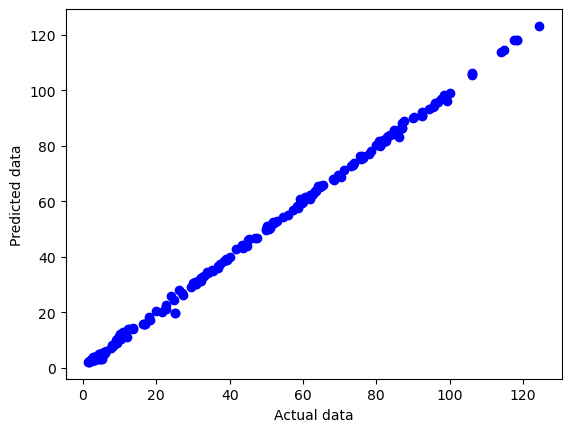

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.09],[0,0.09], color = "red")
#plt.axis ([0,0.09,0,0.09])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

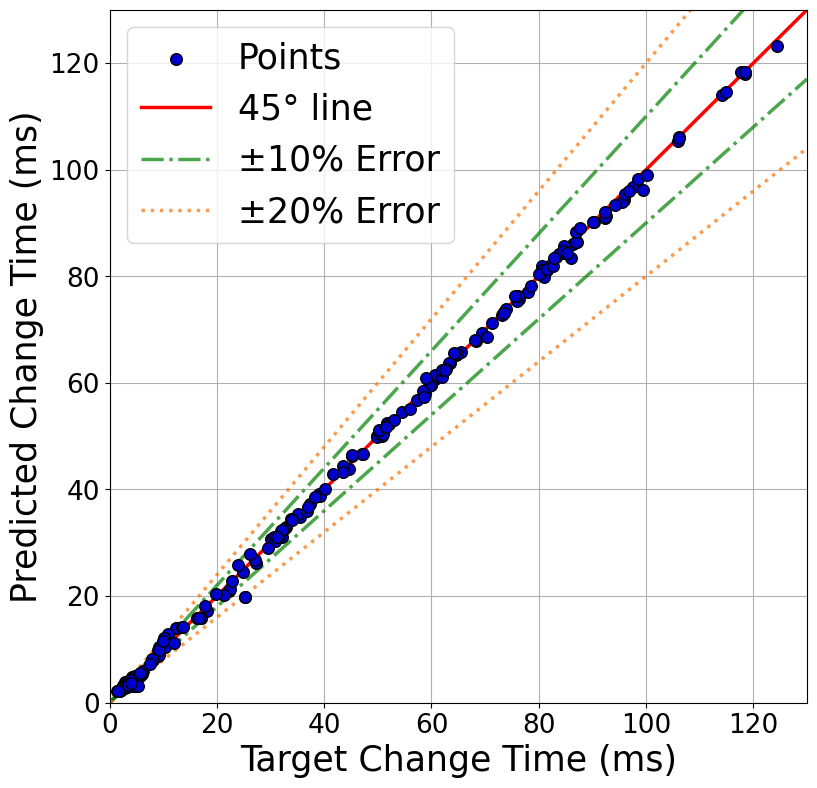

In [19]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = 0
u_l = 130

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Change Time (ms)',fontsize = 25)
plt.xlabel('Target Change Time (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)

x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
#plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('Change_ANN1.png', dpi = 300, bbox_inches = 'tight')

In [20]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

39/39 [==============================] - 0s 2ms/step
0.5875362104145416
0.5955812029112785


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9993679740569889


In [22]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9993623997766011


In [23]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 65.02%
Within 10% margin 76.81%
Within 20% margin 89.35%
Out of 20% margin 10.65%


In [24]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9993606532931701


In [25]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.8739245952551351

In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.5955812029112785